In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/kaggle/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# [하] 각 속성의 통계량을 확인하고 해석하시오

Text(0.5, 1.0, 'Gender countplot')

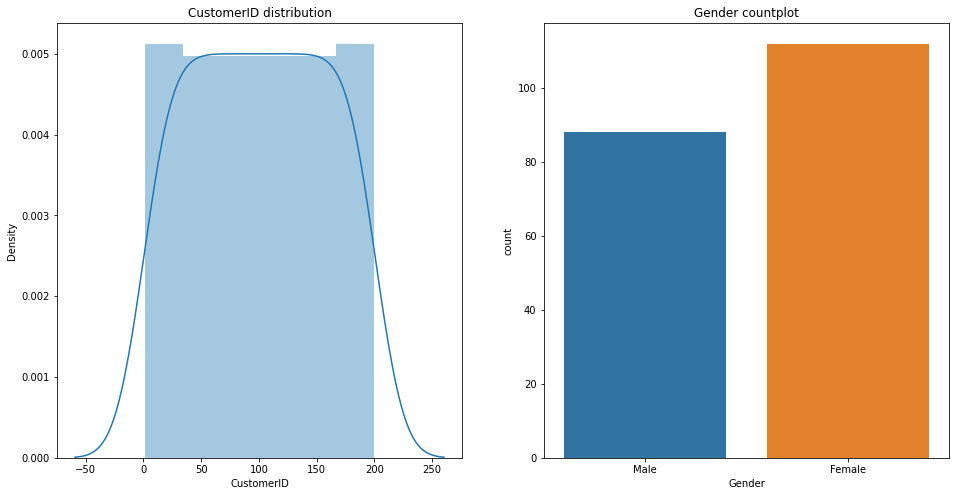

In [5]:
# CustomerID, Gender
# 성별은 여자가 더 많다는 것을 알 수 있다.
fig, ax = plt.subplots(ncols =2, figsize = (16,8))
sns.distplot(data['CustomerID'], ax = ax[0])
ax[0].set_title('CustomerID distribution')

sns.countplot(data['Gender'], ax = ax[1])
ax[1].set_title('Gender countplot')

In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Text(0.5, 1.0, 'Annual Income distribution')

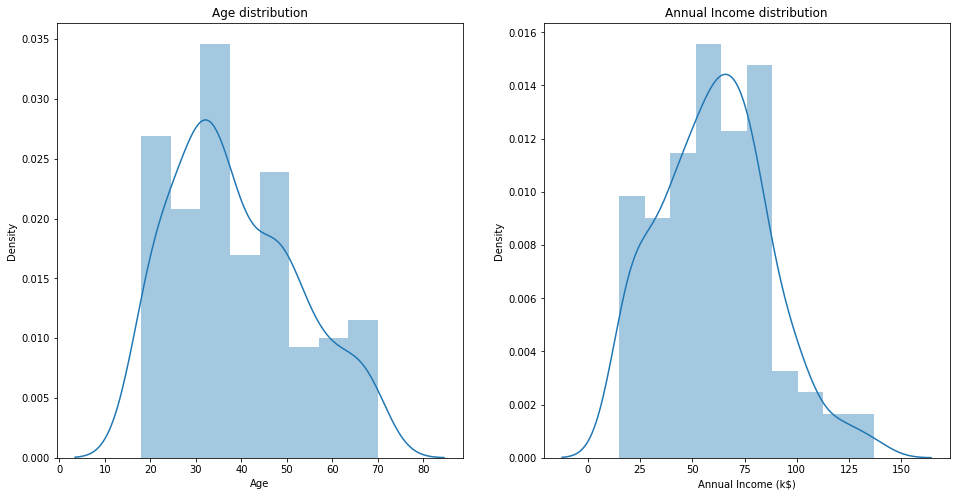

In [7]:
# Age, Income
# Age와 Income의 경우 좌측으로 치우쳐져 있고 로그를 씌워서 평균을 중앙으로 만들어야 겠다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(data['Age'], ax = ax[0])
ax[0].set_title('Age distribution')

sns.distplot(data['Annual Income (k$)'], ax = ax[1])
ax[1].set_title('Annual Income distribution')

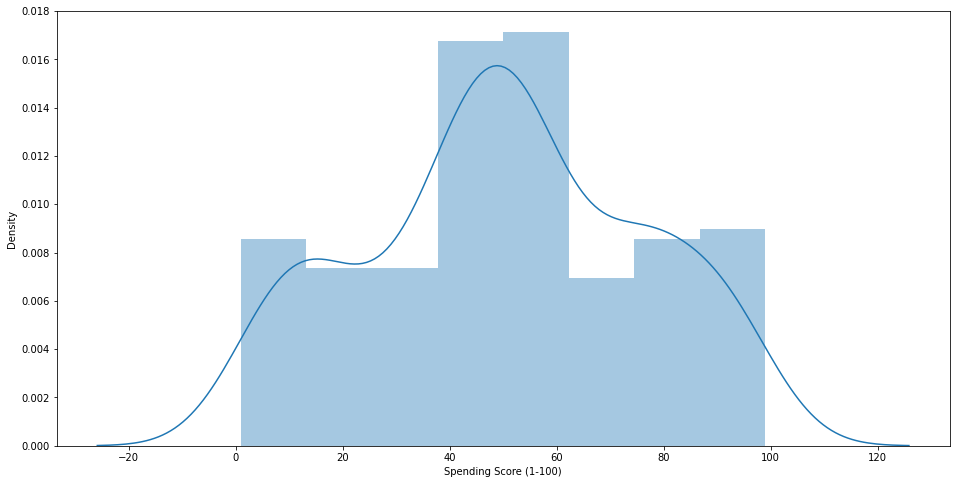

In [8]:
# Spending Score (1-100)
# ?
plt.figure(figsize = (16,8))
sns.distplot(data['Spending Score (1-100)'])

### [상] 적합도검정(goodness of fir test) 해보고 결과를 해석하시오.
###적합도검정 : 가정된 확률이 정해져 있을 때와 가정된 확률이 정해져 있지 않을 때 데이터가 가정된 확률에 적합하게 따르고 있는가를 검정하는 방법이다.

In [9]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
# 적합도검정 코드를 가지고 비교해보기
from scipy import stats
#관측값
data1 = data['Annual Income (k$)']
#기대값
data2 = data['Spending Score (1-100)']
chis = stats.chisquare(data1,data2)
chis
#결과 출력
statistic,pvalue = chis #zip 형태처럼 두개의 변수에 값을 각각 할당
print("static : {}, p-value : {}".format(statistic,pvalue))

if pvalue < 0.05:
    print("신뢰수준하에서 유의한 관계. 대립가설 채택")
else:
    print("신뢰수준하에서 무의미한 관계. 귀무가설 채택")

static : 27598.658632086295, p-value : 0.0
신뢰수준하에서 유의한 관계. 대립가설 채택


# 3. Age와 Spending Score를 corrlation 점수로 plot 하시오(seaborn을 이용하시오).

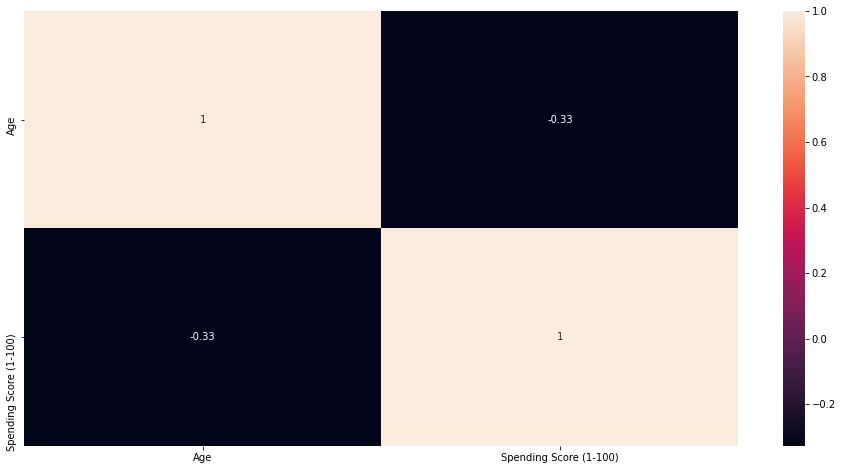

In [14]:
data_mat = data[['Age','Spending Score (1-100)']].corr()
plt.figure(figsize = (16,8))
sns.heatmap(data_mat, annot = True)

# 4. K-mean을 Eblow method을 적용하고 결과를 해석하시오

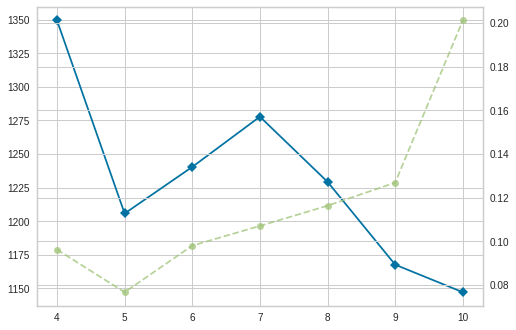

In [30]:
# 군집이 5개일 때 가장 좋은 성능을 낸다.
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

cluster = range(2,11)
data_x = data[['Spending Score (1-100)','Annual Income (k$)']]
model = KMeans()

visualizer = KElbowVisualizer(model, k = (4,11))
visualizer.fit(data_x)
plt.show()

# 5. DBSCAN을 적용하고 결과를 해석하시오.


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1
 -1 -1  2  1  1  2  1 -1  1  1 -1  2  1  2 -1 -1 -1 -1 -1  4  3  4  4  3
  3  3  4  3  4  3 -1 -1 -1  4  5  5  4  5  5 -1  4 -1  5  5  4 -1  4 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


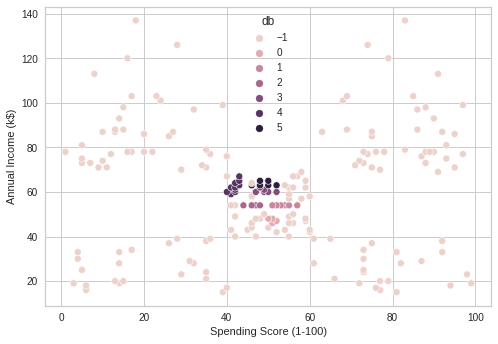

In [51]:
# 데이터가 밀집되어 있지 않기 때문에 DBSACN보다 K-MEAN가 더 잘맞는 경향이 있다.
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2, min_samples= 4)
data_dbscan = dbscan.fit_predict(data_x)
print(data_dbscan)
data_x['db'] = data_dbscan
sns.scatterplot(data = data_x, x = 'Spending Score (1-100)',y = 'Annual Income (k$)',hue = 'db')

# <빅데이터 활용 기획>


# (하)class로 작성하시오.주사위 클래스 Dice를 설계하는데 메소드에는 roll()을 구현하여 주사위를 던져 나온 숫자를 화면에 출력하는 프로그램을 작성하시오.

In [73]:
class Dice:
  import numpy as np
  
  def roll():
    a = np.random.randint(1,7)
    return a

Dice.roll()

4


# 2. (극강의 난이도) 배스킨라빈스 31게임.
<게임규칙>
게임의 참여자들은 차례를 정해 1부터 31까지의 수를 순차적으로 부른다. 한번에 1~3개까지 수를 연달아 부를 수 있으며, 마지막 31을 부른 사람이 진다.
- 컴퓨터가 무조건 먼저 시작하고,1P는 무조건 2번째로 말한다.컴퓨터가 무조건 이기게 만들어라.
<힌트 1> 4n-2라는 공식을 사용하면 됩니다.
<힌트 2>이 게임은 31을 부르면 지는 게임이니 30을 부르면 이깁니다.

In [186]:
class model:
  def int_input():
   a = input(',로 숫자를 구분하세요').split(',')
   final_a = int(a[-1])
   return a, final_a

  def order_a(a):
    what = []
    for i in range(len(a)):
      a[i] = int(a[i])
    
    i = 0
    if len(a) == 3:
      while i < 2:
        if a[i] == a[i+1]-1:
          what.append(True)
          i += 1
        else:
          ('잘못입력했습니다.')
          break

    if len(a) == 2:
      i = 0
      while i < 1:
        if a[i] == a[i+1]-1:
          what.append(True)
          i += 1
        else:
          print('잘못 입력했습니다.')
          break

    if len(a) == 1:
      print('순서를 맞춰서 줬군요!')
      what.append(True)

    return what
    
  def game_start():
    print(1,2)
    final_a = 3
    while final_a < 31:
      # a 불러오기
      a, final_a = model.int_input()
      
      # order_a
      what = model.order_a(a)
      if (what in [False]) | (len(what) == 0):
        print('순서를 왜 잘못 줬어요!')
        break

      sequence = []
      for i in range(1,8):
        if (4*(i-1) + 2 < final_a) & (4*i + 2 > final_a):
          sequence.append(i)

      number = 4*sequence[0] +2 - final_a
      for i in range(1,number+1):
        print(final_a + i)

        if final_a + i == 30:
          print('저의 상대가 안되시는군요!')
          break

model.game_start()

1 2
,로 숫자를 구분하세요3,4,5,6
순서를 왜 잘못 줬어요!


# 3. (중) 내용에 맞게 코드를 작성하시오.
괄호 문자열(Parenthesis String, PS)은 두 개의 괄호 기호인 ‘(' 와 ‘)' 만으로 구성되어 있는 문자열이다. 그 중에서 괄호의 모양이 바르게 구성된 문자열을 올바른 괄호 문자열(Valid PS, VPS)이라고 부른다. 한 쌍의 괄호 기호로 된 “( )” 문자열은 기본 VPS 이라고 부른다. 만일 x 가 VPS 라면 이것을 하나의 괄호에 넣은 새로운 문자열 “(x)”도 VPS 가 된다. 그리고 두 VPS x 와 y를 접합(concatenation)시킨 새로운 문자열 xy도 VPS 가 된다. 예를 들어 “(())()”와 “((()))” 는 VPS 이지만 “(()(”, “(())()))” , 그리고 “(()” 는 모두 VPS 가 아닌 문자열이다. 
여러분은 입력으로 주어진 괄호 문자열이 VPS 인지 아닌지를 판단해서 그 결과를 YES 와 NO 로 나타내어야 한다.

In [188]:
class vps:
  def vps_input():
    a = input('넣어봐라')
    return a

  def vps():
    a = vps.vps_input()
    왼쪽= a.count('(')
    오른쪽 = a.count(')')

    if 왼쪽 == 오른쪽:
      print('vps 입니다.')
    else:
      print('vps가 아닙니다')

vps.vps()

넣어봐라((()))(()()()()()()
vps가 아닙니다


# 4. [하]사칙연산은 Class로 작성하시오.
주의) 내장함수를 사용하면 copy(0점)로 간주.
- 생성자도 호출하시오.

In [77]:
class 사칙연산:
  def sum(x,y):
    return x+y

  def sub(x,y):
    return x-y

  def mul(x,y):
    return x*y

  def div(x,y):
    return x/y

print(사칙연산.sum(1,1),사칙연산.sub(1,1),사칙연산.mul(1,1),사칙연산.div(1,1))

2 0 1 1.0


# 5.[중] 업다운 게임을 작성하시오
소주 병뚜껑에서 1-50까지의 숫자를 말하면 Up또는 Down을 알려주는 코드를 작성하시오.
5번안에 맞추지 않으면 Game over도 출력하시오.

In [137]:
class 병뚜껑:
  def 숫자고르기():
    b = np.random.randint(1,51)
    print('기회는 총 5번 입니다.')
    return int(b)

  def 숫자말하기():
    a = input('숫자를 말씀하세요')
    return int(a)

  def 숫자판별기(a,b):
    if a > b:
      print('down!')
    elif a == b:
      print('숫자를 맞추셨습니다.')
    else:
      print('up!')

  def game_start():
    b = 병뚜껑.숫자고르기()
    print(b)
    for i in range(5):
      a = 병뚜껑.숫자말하기()
      병뚜껑.숫자판별기(a,b)

      if a == b:
        break

병뚜껑.game_start()